## Simple Linear Regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the dataset:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [4]:
df.shape

(23, 2)

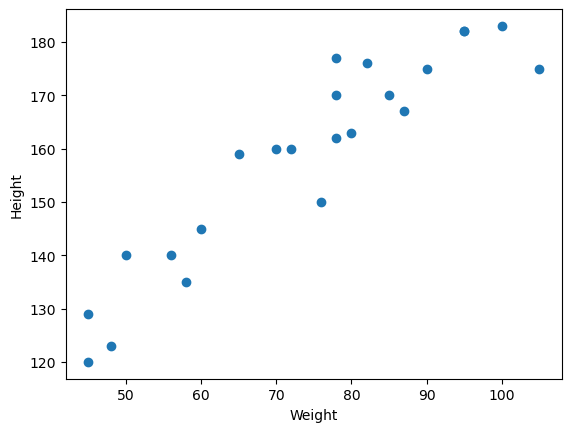

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

#### 1. Divide dataset into dependant and independent dataset:

In [6]:
X = df[['Weight']]    #independent feature.
y = df['Height']     #dependent feature.


In [7]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [8]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

### 2. Train test split:

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:
X.shape

(23, 1)

In [12]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

### Here X train is input records and y train is output records. simillarly x test are input records and x test are output rrecords

### 3. Standardize the data: 
Here for height and weight have different units and different values.
Scaling is necessary in machine learning models because most algorithms don’t treat features equally if they are on very different scales. Here’s why it matters:
#### Only train independant feature scaling is done.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit(X_test)

Here fit will calculate mean and standard deviation and transform will apply z score on each value of X_train.  
and in test data we do only transform. because we dont use mean and standard devation calculated in fit transform for test data. reason is our model should not know anything about the test data. it should have information only about train data.

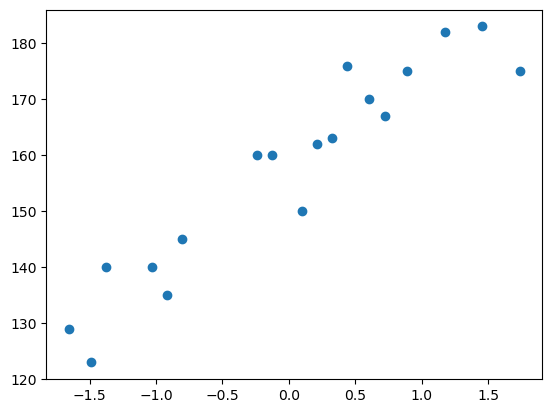

In [17]:
plt.scatter(X_train,y_train)
plt.show()

### Train the simple Linear regression model:

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression() 

In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


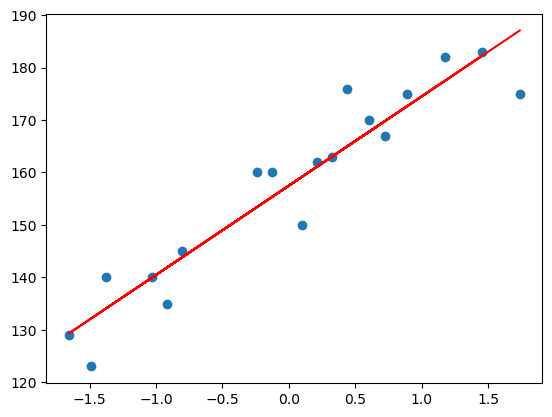

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')
plt.show()